# Visualising results from stLearn LR-CCI analysis on the slideSeq data.

INPUT: 
 * /Volumes/GML001-Q1851/Brad/slideSeq/hipp_LR-CCI.h5ad

OUTPUT: 
 * plots/X5_slideSeq/*
 * /Volumes/GML001-Q1851/Brad/slideSeq/hipp_LR-CCI_clustered.h5ad
 
## Environment Setup 

In [36]:
# TODO change this to your directory
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/mainfigCCI_newCCISupps/'

import os
os.chdir(work_dir)

import numpy as np
import stlearn as st
import scanpy as sc
import matplotlib.pyplot as plt

import scripts.utils.visualisation.helpers as vhs

data_dir = '/Volumes/GML001-Q1851/Brad/slideSeq/'
out_plots = 'plots/X5_slideSeq/'

## Loading the data

In [2]:
data = sc.read_h5ad(data_dir+'hipp_LR-CCI.h5ad')

In [91]:
data.shape

(47573, 20572)

## Visualise the overall ranking of LRs by significant spots

In [92]:
# Reformatting names to correct format of mouse gene names #
data_copy = data.copy()
mouse_lrs = []
for lr in data_copy.uns['lr_summary'].index:
    l, r = lr.split('_')
    l_ = l[0]+l[1:].lower()
    r_ = r[0]+r[1:].lower()
    lr = f'{l_}-{r_}'
    mouse_lrs.append( lr )
data_copy.uns['lr_summary'].index = mouse_lrs

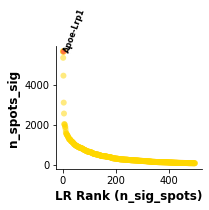

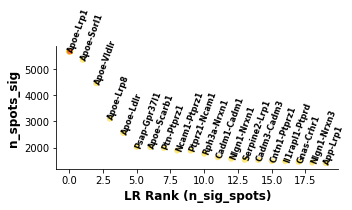

In [94]:
st.pl.lr_summary(data_copy, n_top=500, figsize=(3,3), show=False,
                highlight_lrs=['Apoe-Lrp1'])
vhs.dealWithPlot(True, True, True, out_plots, 'lr_summary_all.pdf', 300)
st.pl.lr_summary(data_copy, n_top=20, figsize=(5,3), 
                 highlight_lrs=['Apoe-Lrp1'], show=False)
vhs.dealWithPlot(True, True, True, out_plots, 'lr_summary_top.pdf', 300)

## Diagnostic plots

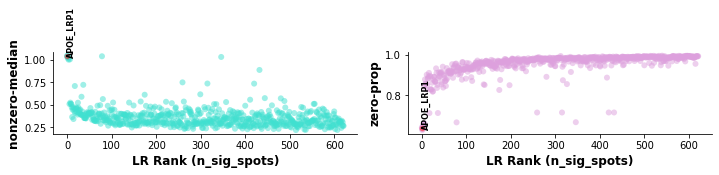

In [99]:
st.pl.lr_diagnostics(data, figsize=(10,2.5), highlight_lrs=['APOE_LRP1'], show=False)
vhs.dealWithPlot(True, True, True, out_plots, 'lr_expr_diags.pdf', 300)

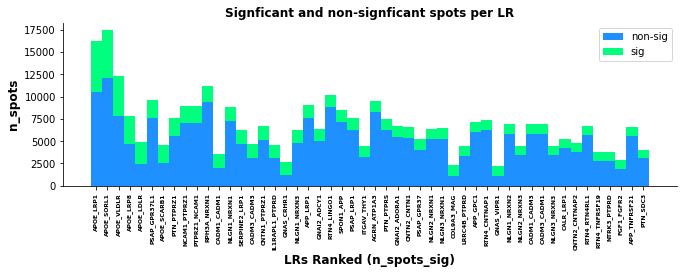

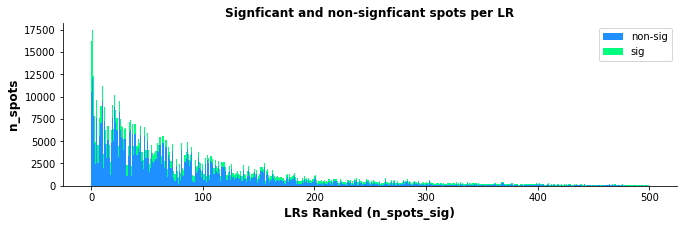

In [5]:
st.pl.lr_n_spots(data, n_top=50, figsize=(11, 3),
                    max_text=100)
st.pl.lr_n_spots(data, n_top=500, figsize=(11, 3),
                    max_text=100)

Diagnostic plots are somewhat concerning, but could be due to actual biology, i.e. those highly expressed LRs are actually the most active. 

Will run GO term analysis below to see if enrichment terms make sense.

## Biologic Plots 

In [6]:
## Running the GO enrichment analysis ##
r_path = "/Library/Frameworks/R.framework/Resources"
st.tl.cci.run_lr_go(data, r_path)

/Users/uqbbalde/opt/miniconda3/envs/STI/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:15: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
R[write to console]: 

R[write to console]: clusterProfiler v4.0.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

R[write to console]: 
Attaching package: ‘clusterProfiler’


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: Loading required package: AnnotationDbi

R[write to console]: Loading required package: stats4

R[write to console]: Loading requi

GO results saved to adata.uns['lr_go']


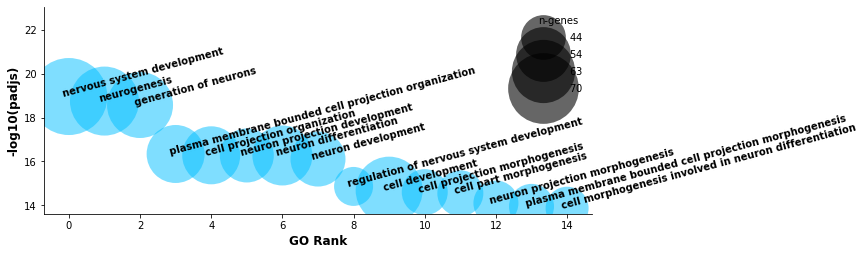

In [16]:
st.pl.lr_go(data, lr_text_fp={'weight': 'bold', 'size': 10}, rot=15,
               figsize=(12,3.65), n_top=15, show=False)
vhs.dealWithPlot(True, True, True, out_plots, 'lr_GO.pdf', 300)

Suggests top 100 are representative of nervous system processes & we are dealying with the mouse hippocampus, so I'm inclined to think these top interactions are real signal. 

Further, when looking into the top result, APOE & LRP1, very important in Alzheimers, with elevation in the signalling via this interaction being linked to neuron loss in the hippocampus:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4065855/

So results look like they make sense when considering the biology.

## LR Statistics Visualisations

In [11]:
best_lr = 'APOE_LRP1'

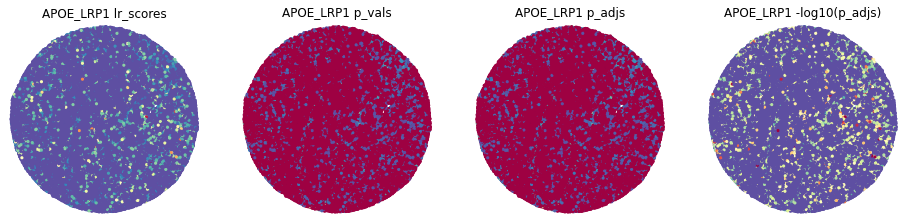

In [17]:
stats = ['lr_scores', 'p_vals', 'p_adjs', '-log10(p_adjs)']
fig, axes = plt.subplots(ncols=len(stats), figsize=(16,6))
for i, stat in enumerate(stats):
    st.pl.lr_result_plot(data, use_result=stat, use_lr=best_lr, show_color_bar=False, ax=axes[i],
                        size=10)
    axes[i].set_title(f'{best_lr} {stat}')

/Users/uqbbalde/Desktop/Uni_Studies/myPython/stlearn_latest/stLearn/stlearn/plotting/classes.py:185: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=self.cmap,


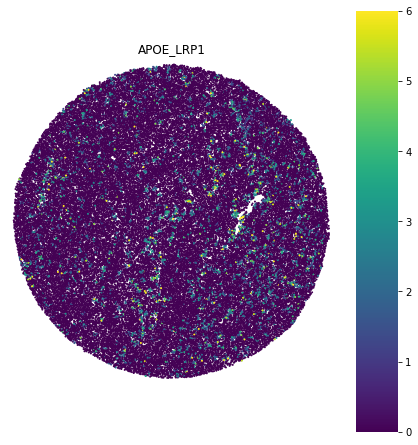

In [29]:
fig, ax = plt.subplots(figsize=(6,12))
st.pl.lr_result_plot(data, use_result='lr_sig_scores', use_lr=best_lr, 
                     show_color_bar=True, 
                     vmax=6, ax=ax, size=4, cmap='viridis')
axes[1].set_title(f'{best_lr} lr_sig_scores')
vhs.dealWithPlot(True, True, True, out_plots, f'{best_lr}_lr_sig_scores.pdf', 300)

The significant interactions appear to follow the molecular layer of the Dentate Gyrus region of the hippocampus, as per the Allen Brain Atlas reference: http://atlas.brain-map.org/atlas?atlas=1&plate=100960240#atlas=1&plate=100960240&resolution=4.19&x=6235.375&y=2380.0472412109375&zoom=-1&structure=776

Further, this paper found APOE/LRP1 colocalise & interact in the hippocampus, hence showing the top result allowed for re-discovery of already known interactions:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4065855/

## Clustering to identify different Hippocampus regions

In [45]:
np.any(np.isinf(data.to_df().values.ravel()))

False

In [ ]:
data.raw = data
sc.pp.log1p(data)

In [63]:
sc.tl.pca(data, use_highly_variable=False)
sc.pp.neighbors(data)

In [66]:
sc.tl.leiden(data, resolution=.8)

11


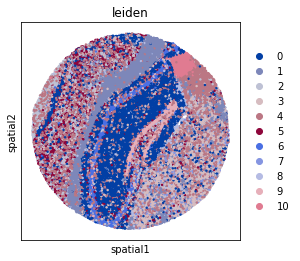

In [67]:
print(len(np.unique(data.obs['leiden'])))
sc.pl.spatial(data, color='leiden')

In [68]:
sc.tl.umap(data)

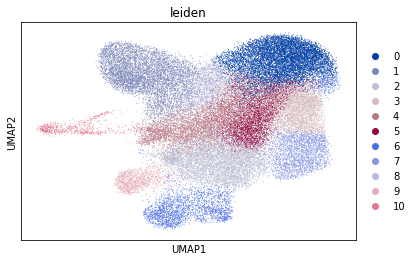

In [69]:
sc.pl.umap(data, color='leiden')

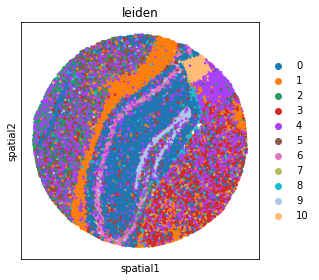

In [82]:
# Updated the colors #
sc.pl.spatial(data, color='leiden', show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'clusters_spatial.pdf', 300)

In [81]:
## Saving the data with the clustering results
data.write_h5ad(data_dir+'hipp_LR-CCI_clustered.h5ad', compression='gzip')

## Plotting genes of top LR pair

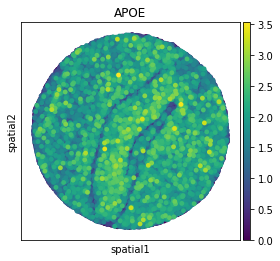

In [79]:
sc.pl.spatial(data, color='APOE', size=2, use_raw=False)

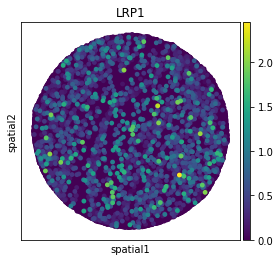

In [80]:
sc.pl.spatial(data, color='LRP1', size=2, use_raw=False)